In [1]:
%load_ext autoreload
%autoreload 2

In [191]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from pypalettes import get_hex
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [192]:
train_data = pd.read_csv("../data/used_car_prices/train.csv")
test_data = pd.read_csv("../data/used_car_prices/test.csv")


In [193]:
train_data.shape, test_data.shape

((188533, 13), (125690, 12))

# Combine Both Datasets

In [194]:
# Add a source column
train_data['source'] = 'train'
test_data['source'] = 'test'

In [195]:
combined = pd.concat([train_data, test_data])
combined.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,source
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,train
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,train


In [196]:
combined = combined.drop(['id'], axis=1)
combined.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,source
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,train
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,train
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,train
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,train
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,train


In [197]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314223 entries, 0 to 125689
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         314223 non-null  object 
 1   model         314223 non-null  object 
 2   model_year    314223 non-null  int64  
 3   milage        314223 non-null  int64  
 4   fuel_type     305757 non-null  object 
 5   engine        314223 non-null  object 
 6   transmission  314223 non-null  object 
 7   ext_col       314223 non-null  object 
 8   int_col       314223 non-null  object 
 9   accident      310139 non-null  object 
 10  clean_title   278565 non-null  object 
 11  price         188533 non-null  float64
 12  source        314223 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 33.6+ MB


# Data Type Change

In [198]:
for col in ['brand', 'model', 'fuel_type', 'ext_col', 'int_col', 'clean_title']:
    combined[col] = combined[col].astype('category')

In [199]:
combined.describe()

,model_year,milage,price
count,314223.000000,314223.000000,1.885330e+05
mean,2015.817009,65840.210567,4.387802e+04
std,5.666116,49969.067924,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24213.000000,1.700000e+04
50%,2017.000000,57690.000000,3.082500e+04
75%,2020.000000,95500.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [200]:
combined.describe(include=['O'])

,engine,transmission,accident,source
count,314223,314223,310139,314223
unique,1118,52,2,2
top,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,train
freq,5651,83036,240777,188533


In [201]:
combined.describe(include=['category'])

,brand,model,fuel_type,ext_col,int_col,clean_title
count,314223,314223,305757,314223,314223,278565
unique,57,1898,7,319,156,1
top,Ford,F-150 XLT,Gasoline,Black,Black,Yes
freq,38353,4868,276473,81028,179287,278565


# Explore Values

In [202]:
combined.value_counts(subset=['accident'])

accident                              
None reported                             240777
At least 1 accident or damage reported     69362
Name: count, dtype: int64

In [203]:
combined.value_counts(subset=['engine'])

engine                                             
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           5651
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           4868
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           4694
2.0L I4 16V GDI DOHC Turbo                             4513
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          4090
                                                       ... 
70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel               3
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       3
111.0HP Electric Motor Electric Fuel System               3
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               2
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1118, dtype: int64

In [204]:
combined.value_counts(subset=['transmission'])

transmission                                      
A/T                                                   83036
8-Speed A/T                                           34586
Transmission w/Dual Shift Mode                        32079
6-Speed A/T                                           30105
6-Speed M/T                                           19863
7-Speed A/T                                           18498
Automatic                                             17866
8-Speed Automatic                                     13977
10-Speed A/T                                          13347
9-Speed A/T                                            6450
5-Speed A/T                                            5458
10-Speed Automatic                                     5268
6-Speed Automatic                                      4690
4-Speed A/T                                            4212
5-Speed M/T                                            4048
9-Speed Automatic                                

# Extract Engine Details

In [205]:
from used_cars_train import extract_or_replace

combined['hp'] = combined['engine'].map(
    lambda value: extract_or_replace(r'(\d+\.\d+)HP', value))

combined['litres'] = combined['engine'].map(
    lambda value: extract_or_replace('(\d+\.\d+)L', value))

combined['cylinders'] = combined['engine'].map(
    lambda value: extract_or_replace('(\d+) Cylinder', value))

In [206]:
combined['hp'] = combined['hp'].astype('float64')
combined['litres'] = combined['litres'].astype('float64')
combined['cylinders'] = combined['cylinders'].astype('float64')

In [207]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314223 entries, 0 to 125689
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   brand         314223 non-null  category
 1   model         314223 non-null  category
 2   model_year    314223 non-null  int64   
 3   milage        314223 non-null  int64   
 4   fuel_type     305757 non-null  category
 5   engine        314223 non-null  object  
 6   transmission  314223 non-null  object  
 7   ext_col       314223 non-null  category
 8   int_col       314223 non-null  category
 9   accident      310139 non-null  object  
 10  clean_title   278565 non-null  category
 11  price         188533 non-null  float64 
 12  source        314223 non-null  object  
 13  hp            258783 non-null  float64 
 14  litres        290602 non-null  float64 
 15  cylinders     251218 non-null  float64 
dtypes: category(6), float64(4), int64(2), object(4)
memory usage: 29.2+ MB


# Split back into Train and Test 

In [208]:
train_data = combined.query('source == "train"')
test_data = combined.query('source == "test"')

train_data.shape, test_data.shape

((188533, 16), (125690, 16))

# Missing Values

<Axes: >

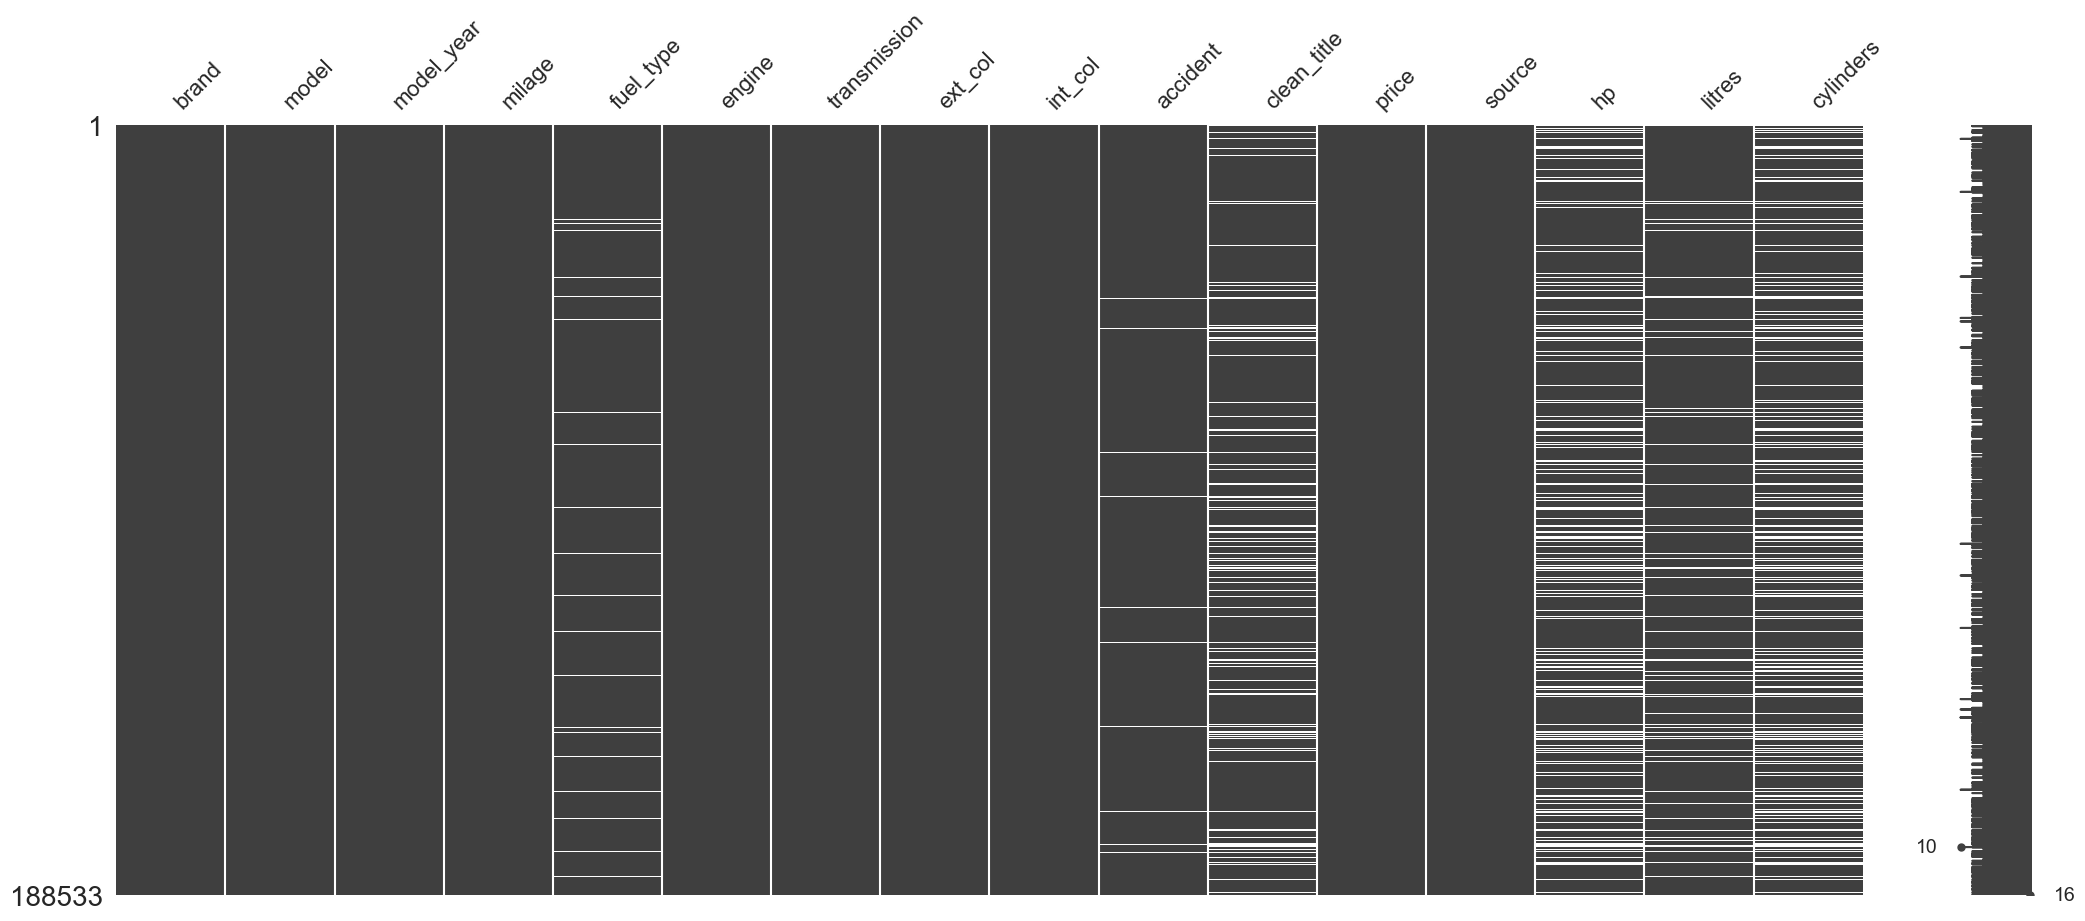

In [209]:
import missingno as msno
msno.matrix(train_data)

In [210]:
from common import null_table

null_table_train = null_table(train_data)
null_table_train

,Columns,Null Count,Percentage
0,cylinders,37855,20.078713
1,hp,33259,17.640943
2,clean_title,21419,11.360876
3,litres,14214,7.539264
4,fuel_type,5083,2.696080
5,accident,2452,1.300568


In [211]:
null_table_test = null_table(test_data)
null_table_test

,Columns,Null Count,Percentage
0,price,125690,100.000000
1,cylinders,25150,20.009547
2,hp,22181,17.647386
3,clean_title,14239,11.328666
4,litres,9407,7.484287
5,fuel_type,3383,2.691543
6,accident,1632,1.298433


In [212]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   brand         188533 non-null  category
 1   model         188533 non-null  category
 2   model_year    188533 non-null  int64   
 3   milage        188533 non-null  int64   
 4   fuel_type     183450 non-null  category
 5   engine        188533 non-null  object  
 6   transmission  188533 non-null  object  
 7   ext_col       188533 non-null  category
 8   int_col       188533 non-null  category
 9   accident      186081 non-null  object  
 10  clean_title   167114 non-null  category
 11  price         188533 non-null  float64 
 12  source        188533 non-null  object  
 13  hp            155274 non-null  float64 
 14  litres        174319 non-null  float64 
 15  cylinders     150678 non-null  float64 
dtypes: category(6), float64(4), int64(2), object(4)
memory usage: 17.5+ MB


In [213]:
for col in ['clean_title', 'fuel_type', 'accident']:
    mode_val = train_data[col].mode()
    train_data[col] = train_data[col].fillna(mode_val)
    
    mode_val = test_data[col].mode()
    test_data[col] = test_data[col].fillna(mode_val)

for col in ['litres', 'hp', 'cylinders', 'price']:
    mean_val = train_data[col].mean()
    train_data[col] = train_data[col].fillna(mean_val)
    
    mean_val = test_data[col].mean()
    test_data[col] = test_data[col].fillna(mean_val)

# Combine Both Datasets Again

In [214]:
combined = pd.concat([train_data, test_data])
combined.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,source,hp,litres,cylinders
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,train,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,train,252.0,3.9,8.0


# Accident Labelling

In [216]:
combined['accident'] = combined['accident'].map({
    'None reported': 0, 
    'At least 1 accident or damage reported': 1
})

# Remove some Columns

In [217]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314223 entries, 0 to 125689
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   brand         314223 non-null  category
 1   model         314223 non-null  category
 2   model_year    314223 non-null  int64   
 3   milage        314223 non-null  int64   
 4   fuel_type     305757 non-null  category
 5   engine        314223 non-null  object  
 6   transmission  314223 non-null  object  
 7   ext_col       314223 non-null  category
 8   int_col       314223 non-null  category
 9   accident      310139 non-null  float64 
 10  clean_title   278565 non-null  category
 11  price         188533 non-null  float64 
 12  source        314223 non-null  object  
 13  hp            314223 non-null  float64 
 14  litres        314223 non-null  float64 
 15  cylinders     314223 non-null  float64 
dtypes: category(6), float64(5), int64(2), object(3)
memory usage: 29.2+ MB


In [220]:
combined = combined.drop(['engine', 'source'], axis=1)
combined.head(3)

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,source,hp,litres,cylinders
0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,0.0,Yes,4200.0,train,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,1.0,Yes,4999.0,train,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,0.0,Yes,13900.0,train,320.0,5.3,8.0


# Label Encoding

In [221]:
object_cols = combined.select_dtypes(include=['object', 'category']).columns
object_cols

Index(['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'clean_title', 'source'],
      dtype='object')

# Training

In [2]:
from used_cars_train import main
main()

22:22:49 | SUCCESS  | Start!
22:22:49 | DEBUG    | Getting Dataset!


D:\workshop\case_studies\used_cars_train.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna({col: mean_val}, inplace=True)
D:\workshop\case_studies\used_cars_train.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna({col: mean_val}, inplace=True)


22:22:57 | INFO     | (188533, 1959), (125690, 1959)


D:\workshop\.venv\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
D:\workshop\.venv\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\workshop\.venv\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
D:\workshop\.venv\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
D:\workshop\.venv\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
D:\workshop\.venv\Lib\site-packages\sklearn\utils\validation.py:1074: FutureWarning: Allowing arbitrary scalar 

22:23:38 | INFO     | Go Forth and Grid Search!
Fitting 5 folds for each of 3 candidates, totalling 15 fits


MemoryError: Unable to allocate 2.20 GiB for an array with shape (150826, 1958) and data type float64